**SUBMISSION INSTRUCTIONS**

It is recommendend that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, **RENAME** the file as **rollno_name.ipynb**

**Submission Deadline : 9/12/2025 Tuesday EOD i.e before 11:59 PM**

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week0

**Github Submission repo** -
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week0

#**Assignment 1**
#**Section 1 (Python)**
#**Problem 1**
In this problem, you will implement a class that represents a data sample with numerical features.  
##  Problem Statement
Create a class named **`DataSample`** that stores:

- A list of numeric **features**
- A string **label**

You must implement the following **three methods** with **exact names** (do NOT rename them):

| Method | Description |
|--------|------------|
| `__init__(self, features, label)` | Initializes object attributes |
| `min_max_norm(self)` | Apply min-max normalization **in-place** |
| `scaled(self, factor)` | Return a **new list** with each feature multiplied by `factor` |

### Min–Max Normalization Formula

![Alt text for the image](https://miro.medium.com/v2/resize:fit:964/1*OnCBKS-Thqa43qNslohDpA.png)


###  Edge Case
If **all features are equal**, then max = min → division by zero.  
Handle this condition by setting all normalized values to **0**.

---

### Your output must behave conceptually like this (not real execution here):
```python
sample = DataSample([10, 20, 30], "cat")
sample.min_max_norm()
print(sample.features)   # expected -> [0.0, 0.5, 1.0]

print(sample.scaled(2))  # expected -> [0.0, 1.0, 2.0]


**Sample Class**

In [1]:
class DataSample:
    def __init__(self, features, label):
        """
        Initialize the object with feature list and label string.
        """
        self.features = features
        self.label = label

    def min_max_norm(self):
        """
        Apply min-max normalization in-place.
        Handle case where max == min by setting all values to 0.
        """
        if not self.features:
            return

        mn = min(self.features)
        mx = max(self.features)

        # Edge case: all equal
        if mn == mx:
            self.features = [0 for _ in self.features]
            return

        # Standard min-max normalization
        self.features = [(x - mn) / (mx - mn) for x in self.features]

    def scaled(self, factor):
        """
        Return a NEW list of features where each element
        is multiplied by factor.
        """
        return [x * factor for x in self.features]


You can check if your code is working correctly using the sample case below

In [2]:
sample = DataSample([3.5, -2.0, 3.5, 10.0, 0.0], "bird")

print("Original features:", sample.features)
print("Label:", sample.label)

sample.min_max_norm()
print("After min-max normalization:", sample.features)

scaled_output = sample.scaled(4.2)
print("After scaling x 4.2 (new list expected):", scaled_output)

# Expected Output:
# Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
# Label: bird
# After min-max normalization: [0.4583, 0.0, 0.4583, 1.0, 0.1667]  (approx values)
# After scaling x 4.2: [1.92486, 0.0, 1.92486, 4.2, 0.70014]

Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
Label: bird
After min-max normalization: [0.4583333333333333, 0.0, 0.4583333333333333, 1.0, 0.16666666666666666]
After scaling x 4.2 (new list expected): [1.925, 0.0, 1.925, 4.2, 0.7]


#**Problem 2**
Sort Based on Unique Character Count

Write a function named **`sort_by_unique_chars`** that sorts a list of strings based on the number of **unique characters** in each string (**descending** order).  
If two strings have the same number of unique characters, sort them **alphabetically**.

Assume that the characters in the words are only consisting of lower-case english alphabets

### Function Definition (DO NOT CHANGE THIS NAME)

```python
def sort_by_unique_chars(words):
    pass

In [3]:
def sort_by_unique_chars(words):

    result = words[:]

    n = len(result)

    for i in range(n):
        best_index = i

        for j in range(i + 1, n):
            a = result[j]
            b = result[best_index]

            ua = len(set(a))
            ub = len(set(b))

            if ua > ub:
                best_index = j
            elif ua == ub and a < b:
                best_index = j

        result[i], result[best_index] = result[best_index], result[i]

    return result


check your code by running the below block

In [4]:
#example case
input_data = ["apple", "banana", "kiwi", "grape", "mango"]
output = sort_by_unique_chars(input_data)
print(output)
# Expected Output:
# ['grape', 'mango', 'apple', 'banana', 'kiwi']

['grape', 'mango', 'apple', 'banana', 'kiwi']


# **Section 2 (NumPy)**
# **Problem 1**

In this problem, you will work with NumPy arrays to practice masking, slicing, advanced indexing, and broadcasting. Follow each step sequentially using only NumPy operations (no Python loops).

## **Problem Statement**

1. **Generate** a 10×10 NumPy array `X` containing random integers between **0 and 100** (inclusive).

2. Create a **boolean mask** selecting all values between **20 and 50** (inclusive).   
   Using this mask, replace those values in `X` with **−1** *in-place*.

3. Extract a **6×6 submatrix** `sub` from the modified `X`:
   - Rows **2 to 8** ( 8 excluded )
   - Columns **3 to 9** ( 9 excluded )

4. Using **advanced NumPy indexing**, extract all **diagonal elements** of the 6×6 submatrix `sub` into a 1D array `diag_vals`.  
   *Hint: use* `np.arange(6)`.

5. Construct a **10×10 structured matrix** `M` using broadcasting, where:

    `M[i, j] = (i - j)²`

    for all `0 ≤ i, j < 10`. This must be done **without loops**.


In [5]:
import numpy as np

# 1. Generate 10x10 array with random integers 0–100 (inclusive)
X = np.random.randint(0, 101, size=(10, 10))

# 2. Create boolean mask for values between 20 and 50 (inclusive)
mask = (X >= 20) & (X <= 50)

# 3. Replace those values in X with -1 in-place
X[mask] = -1

# 4. Extract 6x6 submatrix: rows 2–7, cols 3–8
sub = X[2:8, 3:9]

# 5. Extract diagonal elements of sub using advanced indexing
indices = np.arange(6)
diag_vals = sub[indices, indices]   # 1D array of length 6

# 6. Construct 10x10 structured matrix M with M[i, j] = (i - j)^2 using broadcasting
i = np.arange(10).reshape(10, 1)    # column vector (10x1)
j = np.arange(10).reshape(1, 10)    # row vector   (1x10)
M = (i - j) ** 2                    # broadcast to (10x10)


# **Problem 2**

In this problem, you will work with NumPy arrays representing class scores for multiple samples.
You will practice row-wise normalization, broadcasting, and boolean masking.

## **Problem Statement**

1. Create a NumPy array `scores` of shape 5×4 containing integer values between **0 and 20** (inclusive).  
   Each row represents a sample, and each column represents a score for one of the 4 classes.

2. For each row in `scores`, subtract the **maximum value of that row** from all elements in that row.  
   This operation must be performed using **broadcasting** (no loops allowed).

   *Hint:*  
   `scores.max(axis=1, keepdims=True)` produces a (5×1) column of row-wise maxima.

3. Compute a new array `exp_scores` by applying the exponential function to each element:

   `exp_scores = np.exp(shifted_scores)`

4. **Normalize each row** of `exp_scores` so that each row sums to **1**.  
   Store the resulting array in `probs`.  

   The transformation is conceptually shown by the formula:

   <img src="https://miro.medium.com/v2/resize:fit:300/1*bol3L-WNVacCscvG-rlypQ.png" width="250"/>

   Which corresponds to:

   `probs[i, j] = exp_scores[i, j]/sum(exp_scores[i, :])`

5. Compute the **predicted class** for each sample by taking the index of the largest value in each row of `probs`.  
   Store this in a 1D array `y_pred` of length 5.

6. Create a NumPy array `y_true` of length 5 containing the true class labels (each between 0 and 3).

7. Create a boolean array `correct_mask` indicating whether each predicted label matches the true label.  
   Then compute the **accuracy** using:

   `accuracy = correct_mask.mean()`


In [6]:
import numpy as np

# 1. Create a 5×4 array of random integer scores between 0 and 20
scores = np.random.randint(0, 21, size=(5, 4))

# 2. Subtract row-wise maximum using broadcasting
row_max = scores.max(axis=1, keepdims=True)
shifted_scores = scores - row_max

# 3. Apply exponential
exp_scores = np.exp(shifted_scores)

# 4. Normalize each row to sum to 1 → softmax
row_sums = exp_scores.sum(axis=1, keepdims=True)
probs = exp_scores / row_sums

# 5. Predicted class = index of largest probability in each row
y_pred = probs.argmax(axis=1)

# 6. Create true labels (random integers 0–3)
y_true = np.random.randint(0, 4, size=5)

# 7. Boolean mask of correct predictions
correct_mask = (y_pred == y_true)

# 8. Accuracy = mean of correctness
accuracy = correct_mask.mean()


#Section 3 - Pandas and MatPlotLib


#Creating Batches for Training and Testing Using Pandas

Download the following .csv file from the given link directly using commands in colab - url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

In [7]:
!curl -o StudentsPerformance.csv "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57021  100 57021    0     0   162k      0 --:--:-- --:--:-- --:--:--  162k


--2025-12-06 13:34:08--  https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57021 (56K) [text/plain]
Saving to: ‘StudentsPerformance.csv’

StudentsPerformance 100%[===================>]  55.68K  --.-KB/s    in 0.02s   

2025-12-06 13:34:08 (3.20 MB/s) - ‘StudentsPerformance.csv’ saved [57021/57021]



In [8]:
import pandas as pd

Import the csv file as a dataframe

In [9]:
df = pd.read_csv("StudentsPerformance.csv")

Write the command to be able to see the first 5 rows

In [10]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Create multiple dataframes with the following columns sorted : gender, race, math, reading and writing scores.

(meaning create df1, df2, df3 etc. with the math score sorted in df1, gender wise sorted in df2 etc.)

In [12]:
# gender
df1 = df.sort_values(by="gender")

In [13]:
# race/ethnicity
df2 = df.sort_values(by="race/ethnicity")

In [16]:
# math
df3 = df.sort_values(by="math score")

In [17]:
# reading
df3 = df.sort_values(by="reading score")

In [18]:
# writing
df3 = df.sort_values(by="writing score")

Create 2 non-overlapping dataframes test_df and train_df such that 20% of the rows are in test_df and the rest in train_df

In [19]:
df_shuffle = df.sample(frac=1, random_state=42)
split = int(0.2 * len(df_shuffle))

test_df  = df_shuffle.iloc[:split]

In [20]:
train_df = df_shuffle.iloc[split:]

Plot a bar graph such that you can see the distribution of race in test and train dataset. Are the proportions of races almost same in train and test datasets ? If not what can you do so that the proportions of races in the test and train datasets are close ?


Hint : Think Sorting on the race/ethnicity column and then applying some logic.

In [22]:
# to clarify if the split of races A, B, C, D and E are nearly say 0.2, 0.15, 0.25, 0.17, 0.23
# then I expect an almost similar split in the train_df and test_df

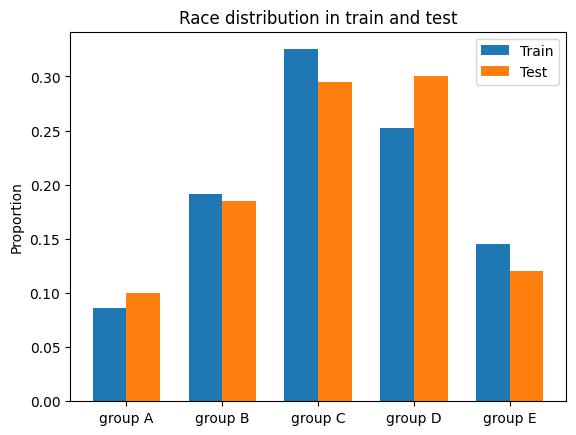

Train proportions:
 race/ethnicity
group A    0.08625
group B    0.19125
group C    0.32500
group D    0.25250
group E    0.14500
Name: proportion, dtype: float64

Test proportions:
 race/ethnicity
group A    0.100
group B    0.185
group C    0.295
group D    0.300
group E    0.120
Name: proportion, dtype: float64


In [23]:
import numpy as np
import matplotlib.pyplot as plt

train_race = train_df['race/ethnicity'].value_counts(normalize=True).sort_index()
test_race  = test_df['race/ethnicity'].value_counts(normalize=True).sort_index()

x = np.arange(len(train_race.index))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, train_race.values, width, label='Train')
ax.bar(x + width/2, test_race.values,  width, label='Test')

ax.set_xticks(x)
ax.set_xticklabels(train_race.index)
ax.set_ylabel('Proportion')
ax.set_title('Race distribution in train and test')
ax.legend()
plt.show()

print("Train proportions:\n", train_race)
print("\nTest proportions:\n", test_race)

Even if it the proportions are almost same think of a way to create the train_df and test_df to have similar proportions of races.

In [24]:
def split_by_race(df, test_frac=0.2, random_state=42):

    df = df.sort_values("race/ethnicity")

    test_parts = []
    train_parts = []

    for race, group in df.groupby("race/ethnicity"):
        n_test = int(len(group) * test_frac)

        test_sample = group.sample(n=n_test, random_state=random_state)
        train_sample = group.drop(test_sample.index)

        test_parts.append(test_sample)
        train_parts.append(train_sample)

    test_df  = pd.concat(test_parts).sample(frac=1, random_state=random_state).reset_index(drop=True)
    train_df = pd.concat(train_parts).sample(frac=1, random_state=random_state).reset_index(drop=True)

    return train_df, test_df


# Use it:
train_df, test_df = split_by_race(df, test_frac=0.2)

Usually when we train machine learning models we use batches. Each batch is a subset of train_df of legth batch_size. Create Batches: a list of batch each of size 50 from the train_df

In [25]:
batch_size = 50

In [26]:
train_shuffled = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

Batches = [
    train_shuffled.iloc[i : i + batch_size]
    for i in range(0, len(train_shuffled), batch_size)
]

Print the size of Batches and first few rows of Batches[0]

In [28]:
print("Number of batches:", len(Batches))
print("\nFirst batch shape:", Batches[0].shape)
print("\nFirst few rows of Batches[0]:")
Batches[0].head()

Number of batches: 17

First batch shape: (50, 8)

First few rows of Batches[0]:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,high school,free/reduced,none,41,46,43
1,female,group D,high school,standard,none,62,64,64
2,female,group B,high school,free/reduced,completed,76,85,82
3,female,group C,some college,standard,none,73,80,82
4,female,group E,associate's degree,standard,completed,65,75,77
